In [ ]:
# Darkneti yükleme
!git clone https://github.com/pjreddie/darknet.git
import os
os.chdir("/content/darknet")

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
!ls

cfg	  include	LICENSE.gen   LICENSE.mit  python     src
data	  LICENSE	LICENSE.gpl   LICENSE.v1   README.md
examples  LICENSE.fuck	LICENSE.meta  Makefile	   scripts


In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
In file included from /usr/include/string.h:495,
                 from ./src/utils.c:3:
In function ‘strncpy’,
    inlined from ‘copy_string’ at ./src/utils.c:426:5:
/usr/include/x86_64-linux-gnu/bits/string_fortified.h:106:10: warning: ‘__builtin_strncpy’ specified bound depends on the length of the source argument [-Wstringop-overflow=]
  106 |   return __builtin___strncpy_chk (__dest, __src, __len, __bos (__dest));
      |          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
./src/utils.c: In function ‘copy_string’:
./src/utils.c:426:22: note: length computed here
  426 |     strncpy(copy, s, strlen(s)+1);
      |                      ^~~~~~~~~
gcc -Iinclude/ -Isrc/ -Wa

YOLOv1 Model ağırlıklarını indirme


In [ ]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights


URL transformed to HTTPS due to an HSTS policy
--2023-05-16 07:56:11--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights’

yolov1.weights      100%[===================>] 752.75M  20.7MB/s    in 37s     

2023-05-16 07:56:49 (20.2 MB/s) - ‘yolov1.weights’ saved [789312988/789312988]



Köpek resmimizle modelimizi test edelim!

In [ ]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/data/dog.jpg


layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->


*   dog: 26%
*   car: 74%
*   bicycle: 39%

Ayrıca resmimizi predictions.png olarak da kayıt etti. Kayıt edilen resmimize bakmak için opencv ve matplotlib kütüphanelerini kullanarak bakalım. 

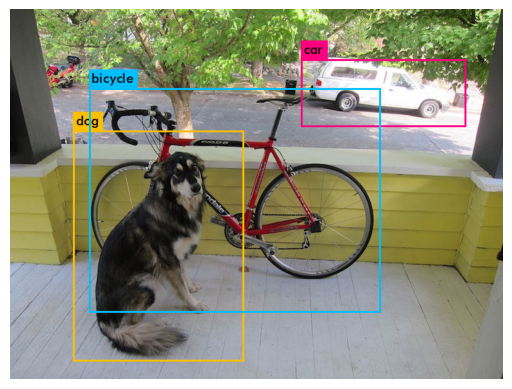

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
pathfig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)

In [ ]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/data/kite.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

In [ ]:
os.chdir("/content")
from google.colab import files
uploaded = files.upload()

Saving cat.mp4 to cat.mp4


In [ ]:
os.chdir("/content/darknet/")
!./darknet yolo test /content/darknet/cfg/yolov1-tiny.cfg /content/tiny-yolov1.weights /content/cat.mp4


layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   448 x 448 x   3   ->   448 x 448 x  16  0.173 BFLOPs
    1 max          2 x 2 / 2   448 x 448 x  16   ->   224 x 224 x  16
    2 conv     32  3 x 3 / 1   224 x 224 x  16   ->   224 x 224 x  32  0.462 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  32   ->   112 x 112 x  32
    4 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64  0.462 BFLOPs
    5 max          2 x 2 / 2   112 x 112 x  64   ->    56 x  56 x  64
    6 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128  0.462 BFLOPs
    7 max          2 x 2 / 2    56 x  56 x 128   ->    28 x  28 x 128
    8 conv    256  3 x 3 / 1    28 x  28 x 128   ->    28 x  28 x 256  0.462 BFLOPs
    9 max          2 x 2 / 2    28 x  28 x 256   ->    14 x  14 x 256
   10 conv    512  3 x 3 / 1    14 x  14 x 256   ->    14 x  14 x 512  0.462 BFLOPs
   11 max          2 x 2 / 2    14 x  14 x 512   ->     7 x   7 x 512
   12 con

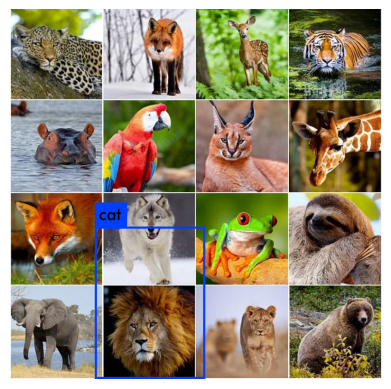

In [ ]:
pathfig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)